## Librairies

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.pyplot as plt


## image2np

In [24]:
def image2np(image):
    '''Convertie une image en noir et blanc en une matrice M.
    Renvoie cette matrice M et la valeur maximale nbr_tag que prend M[i,j].
    M[i,j]=0 correspond à un pixel blanc et M[i,j]!=0 correspond à un pixel noir.
    Si deux éléments de M ont une même valeur non nul, alors ils appartiennent au même caractère (la réciproque est fausse à la fin de cette fonction).
    
    Argument: image--> une image, en noir et blanc, lue par le biais de la bibliothèque PIL.
    '''
    colonne,ligne = image.size
    M=np.zeros((ligne, colonne), dtype=np.uint8)
    nbr_tag=0
    for i in range(ligne):
        for j in range(colonne):
            if image.getpixel((j,i))[0] < 100:
                if M[i,j-1]!=0: M[i,j]=M[i,j-1]
                elif M[i-1,j-1]!=0: M[i,j]=M[i-1,j-1]
                elif M[i-1,j]!=0: M[i,j]=M[i-1,j]
                else:
                    nbr_tag+=1
                    M[i,j]=int(nbr_tag)
    return M, nbr_tag

##### image2np prend en argument une image traité par la bibliothèque PIL et renvoie:
    -M,une matrice numpy qui représente l'image donnée;
    -nbr_tag, un entier correspondant à la valeur maximale que peut prendre la matrice.


### Exemple d'application:

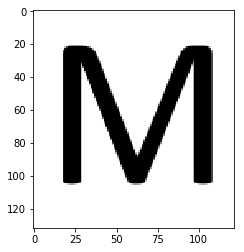

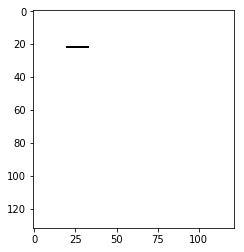

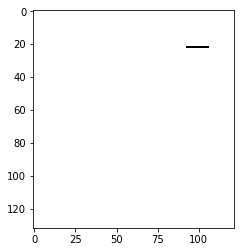

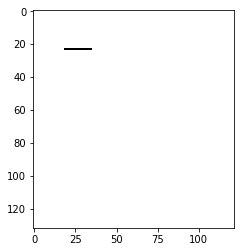

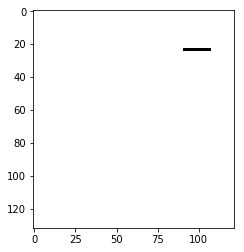

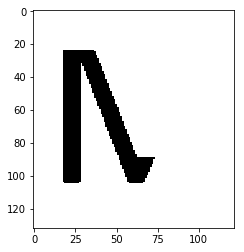

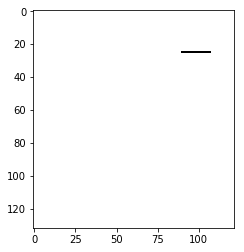

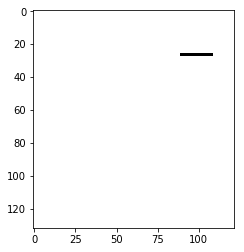

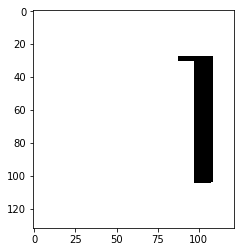

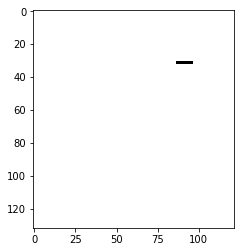

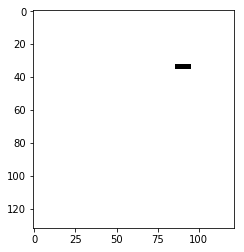

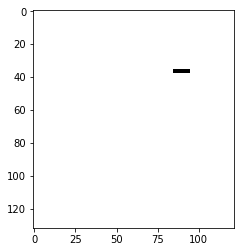

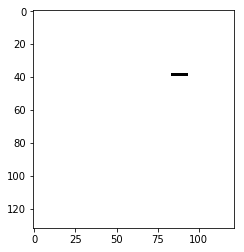

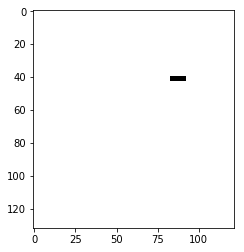

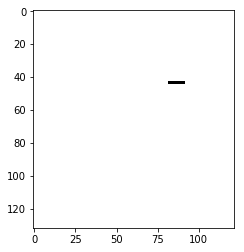

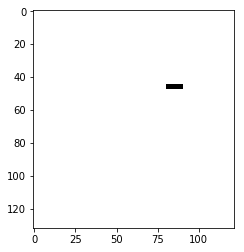

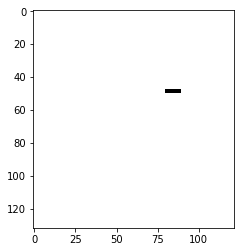

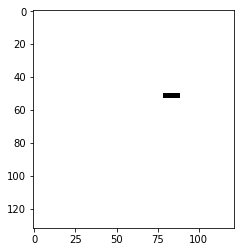

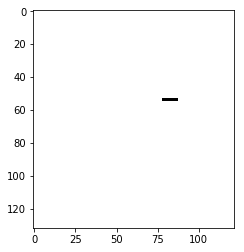

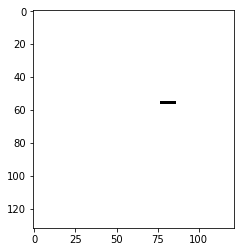

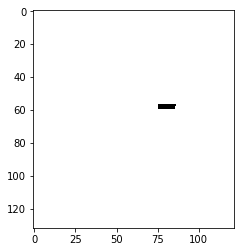

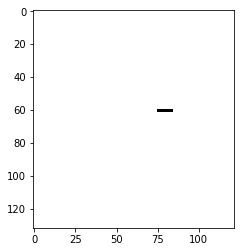

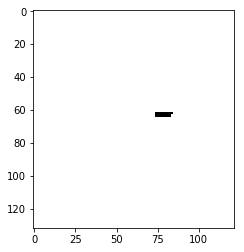

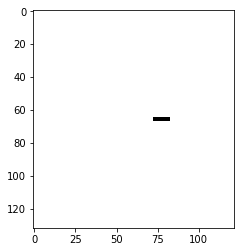

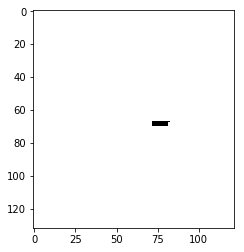

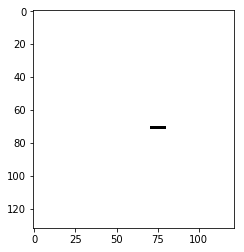

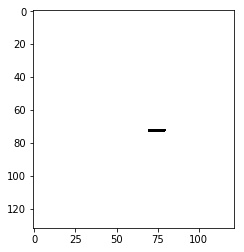

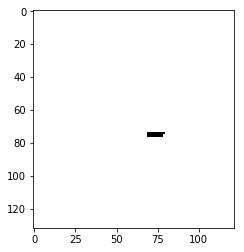

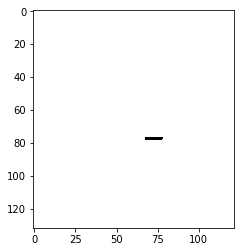

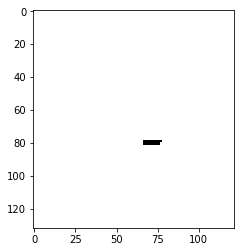

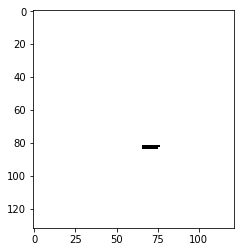

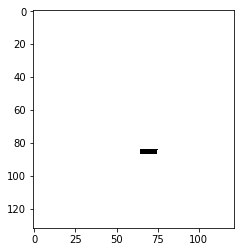

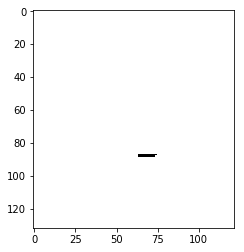

In [25]:
img1 = Image.open('M.png') # The image file must exist in the same directory as the script
plt.imshow(img1)
plt.show()
M1, nbr_tag = image2np(img1)
ligne, colonne = np.shape(M1)
Matr=np.zeros((ligne, colonne), dtype=np.uint8)
for k in range (nbr_tag):
    for i in range(ligne):
        for j in range(colonne):
            if M1[i,j]==k+1:
                Matr[i,j]=0
            else:
                Matr[i,j]=255
    a = Image.fromarray(Matr)
    plt.imshow(a, cmap='Greys_r')
    plt.show()


## memeTag

In [26]:
def memeTag(M, nbr_tag):
    '''Renvoie une liste tag_liste de sous-listes. Chaque sous liste contient les tags correspondant à un même caractère de la matrice recherchée.
    
    Arguments:
        -M: une matriice numpy taguée;
        -nrb_tag: un entier correspondant à la valeur maximal que peut prendre un élément de la matrice.
    '''
    ligne, colonne = np.shape(M)
    def f(M):
        ligne, colonne = np.shape(M)
        pair_liste=[]
        for i in range(1, ligne-1):
            for j in range(1,colonne-1):
                if M[i,j]!=0:
                    tag=M[i,j]
                    voisins=[ M[i,j-1], M[i-1,j-1], M[i-1,j] ]
                    if voisins[0]!=0 and voisins[0]!=tag and [ min( tag, voisins[0] ), max( tag, voisins[0] )] not in pair_liste:
                        pair_liste.append( [min( tag, voisins[0] ), max( tag, voisins[0] )] )
                    
                    elif voisins[1]!=0 and voisins[1]!=tag and [ min( tag, voisins[1] ), max( tag, voisins[1] )] not in pair_liste:
                        pair_liste.append( [min( tag, voisins[1] ), max( tag, voisins[1] )] )
                    
                    elif voisins[2]!=0 and voisins[2]!=tag and [ min( tag, voisins[2] ), max( tag, voisins[2] )] not in pair_liste:
                        pair_liste.append( [min( tag, voisins[2] ), max( tag, voisins[2] )] )   
        return pair_liste
    
    pair_liste = f(M)
    tag_liste=[]
    solo_tag = [[i+1] for i in range(nbr_tag)]
    if len(pair_liste)!=0:
        couple = pair_liste.pop(0)
        tag_liste.append(couple)
        solo_tag.remove(couple[0]), solo_tag.remove(couple[1])
        while len(pair_liste)!=0:
            couple = pair_liste.pop(0)
            if couple[0] in solo_tag: solo_tag.remove(couple[0])
            if couple[1] in solo_tag: solo_tag.remove(couple[1])
            
            i0, i1 = None, None
            for i in range(len(tag_liste)):
                tags=list(tag_liste[i])
                if i0 is None and couple[0] in tags: i0=i
                if i1 is None and couple[1] in tags: i1=i                  
            if i0 is None:
                if i1 is None: tag_liste.append(couple)
                    # aucun des arguments du couple est présent dans une des sous listes de tag_liste.
                else: tag_liste[i1].append(couple[0])
                    # couple[1] appartient à la i1 ème sous liste de tags mais i0 n'est pas dans tag_liste.
            elif i1 is None: tag_liste[i0].append(couple[1])
                # couple[0] appartient à la i0 ème sous liste de tags mais i1 n'est pas dans tag_liste.     
            else:
                # couple[0] et couple[1] sont respectivement dans la i0 ème et i1 ème sous liste de tag_liste.
                if i0!=i1:
                    imin = min(i0,i1)
                    tags=tag_liste.pop(max(i0,i1))
                    for k in tags:
                        tag_liste[imin].append(k)
    tag_liste += solo_tag
    return tag_liste

##### memeTag prend en argument:
    -M,une matrice numpy M qui est tagué;
    -nbr_tag, un entier correspondant à la valeur maximale que peut prendre la matrice.

#### memeTag utilise une fonction f qui recherche et renvoie sous forme de liste les couples de tags voisins de la matrice M. A partir de cette liste, memeTag créé "une tag-liste" dont ses arguments sont les listes des tags correspondant à une même  région (dans notre exemple des caractères); puis la renvoie.



### Exemple d'application:

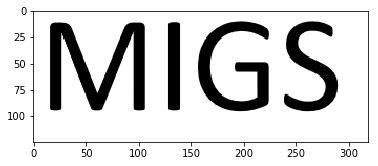

[[1, 4, 9, 13, 16, 19, 22, 24, 27, 29, 33, 35, 39, 44, 74, 76, 79, 81, 83, 85, 87, 89, 77, 78], [2, 7], [3, 8, 12, 15, 18, 21, 23, 26, 28, 30, 32, 34, 37, 38, 41, 43, 45, 47, 49, 51, 53, 55, 59, 60, 62, 63, 80, 82, 84, 86, 88], [5, 10, 14, 6, 11, 17, 20, 25, 31, 36, 40, 42, 46, 48, 50, 52, 54, 56, 57, 58, 61, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75]]


In [27]:
img2 = Image.open('MIGS.png')
plt.imshow(img2)
plt.show()
M2, nbr_tag = image2np(img2)
print(memeTag(M2, nbr_tag))

## matriceTague

In [28]:
def matriceTague(M, tag_liste):
    '''
    '''
    ligne, colonne = np.shape(M)
    n=len(tag_liste)
    position_caracteres = [[ligne, -1, colonne, -1] for i in range(n)]
    position_caracteres = np.array(position_caracteres)
    #liste de la forme [[i1_min, i1_max, j1_min, j1_max], ..., [in_min, in_max, jn_min, jn_max]] avec 1,...,n les différennts caractères
    nombre_pixels = [0]*n
    for i in range(ligne):
        for j in range(colonne):
            if M[i,j]!=0:
                for k in range(n):
                    if M[i,j] in tag_liste[k]:
                        M[i,j] = k+1
                        nombre_pixels[k] += 1
                        if i<position_caracteres[k, 0]: position_caracteres[k, 0] = i
                        elif i>position_caracteres[k, 1]: position_caracteres[k, 1] = i
                        if j<position_caracteres[k, 2]: position_caracteres[k, 2] = j
                        elif j>position_caracteres[k, 3]: position_caracteres[k, 3] = j
                        break
    return position_caracteres, nombre_pixels

#### matriceTague prend en arguments:
    -la matrice numpy tagué M;
    -tag_liste.
    
#### Et renvoie:
    -la position de chaque région sous forme de liste;
    -le nombre_pixels noirs de chaque région.

## sauvegarder_regions

In [29]:
def sauvegarder_regions(position_caracteres, nom_txt='regions.txt'):
    '''
    '''
    fichier=open(nom_txt,'w')
    for k in range(len(position_caracteres)):
        imin, jmin = position_caracteres[k][0], position_caracteres[k][2]
        string = str(imin)+'; '+ str(jmin)
        fichier.write(string+'\n')
    fichier.close()

## sauvegarder_images

In [30]:
def sauvegarder_images(image, position_caracteres, nom_image="Charactère_", format='.jpg'):
    '''
    '''
    for k in range(len(position_caracteres)):
        img = image.crop((position_caracteres[k][2]-1, position_caracteres[k][0]-1, position_caracteres[k][3]+1, position_caracteres[k][1]+1))
        img.save(nom_image+str(k+1)+format)

In [31]:
def afficheListeTag(image, nom_txt='regions.txt', sauve_image=False, nom_image="Charactère_", format='.jpg'):
    M, nbr_tag = image2np(image)
    tag_liste = memeTag(M, nbr_tag)
    position_caracteres, nombre_pixels = matriceTague(M, tag_liste)
    if sauve_image: sauvegarder_images(image, position_caracteres, nom_image, format)
    sauvegarder_regions(position_caracteres, nom_txt)

In [33]:
afficheListeTag(img2, nom_txt='MIGS.txt')